In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [117]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [118]:
X = dataset.iloc[:,1:2].values
Y = dataset.iloc[:,2].values

In [119]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [120]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [121]:
# 餵養線性回歸

In [122]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 多項線性模型

In [123]:
from sklearn.preprocessing import PolynomialFeatures

In [131]:
poly_reg = PolynomialFeatures(degree=4)

# [1,2,3,4,5]         = 直線
# [1,4,9,16,25]     = 曲線  
# [1,8,27,64,125] = 更彎曲的線

# Tip 如果看到需要餵養的參數是矩陣型態，二話不說直接用fi.transform() 沒有特別說明是要餵養矩陣型態，可用fit()

In [132]:
X_poly = poly_reg.fit_transform(X)

# 1*1^2
# 1*2^2
# 1*3^2

In [133]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [134]:
poly_reg.fit(X_poly,Y)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [135]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

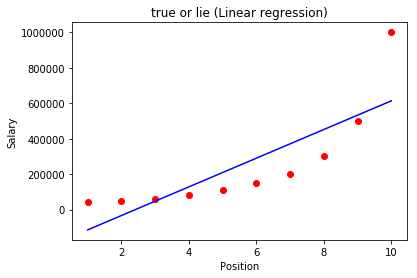

In [136]:
#數據可視化
plt.scatter(X,Y,color ="red")
plt.plot(X,lin_reg.predict(X),color= "blue")
plt.title("true or lie (Linear regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

# 由此圖可得知，模型數據與真實世界情況並不相符，兩年經驗的薪水，應該要拿更低，而四年經驗的薪水，應該要拿更高，可見此模型預測的結果並不實用

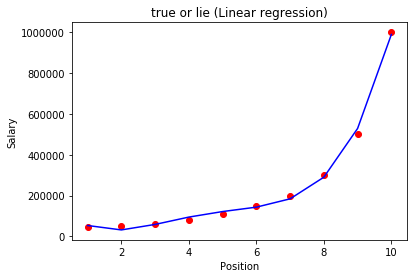

In [137]:
#數據可視化(多項)
plt.scatter(X,Y,color ="red")
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)),color= "blue")
plt.title("true or lie (Linear regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [144]:
#數據可視化(多項)
X_grid = np.arange(min(X),max(X),0.1)
X_grid


array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [145]:
X_grid = X_grid.reshape(len(X_grid),1)
X_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

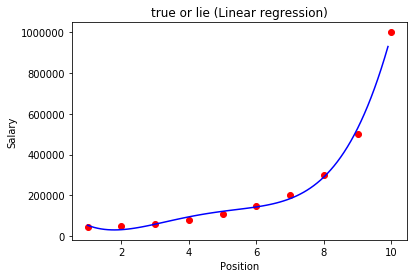

In [147]:
plt.scatter(X,Y,color ="red")
plt.plot(X_grid,lin_reg2.predict(poly_reg.fit_transform(X_grid)),color= "blue")
plt.title("true or lie (Linear regression)")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [149]:
#作出預測
lin_reg.predict(6.5)

array([330378.78787879])

In [150]:
#作出預測(線性)
lin_reg2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])